# XOR with NNet in python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('..')
from utils.XOR import XOR

In [2]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

| X1 | X2 | y = X1 XOR X2 |
| -- | -- | -- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [3]:
xor_obj = XOR(n_epochs=5000, lr=0.1)
xor_obj.train(X, y)

## Tests

In [4]:
assert xor_obj.predict([1, 0]) == 1
assert xor_obj.predict([0, 0]) == 0
assert xor_obj.predict([0, 1]) == 1
assert xor_obj.predict([1, 1]) == 0

## MSE graph

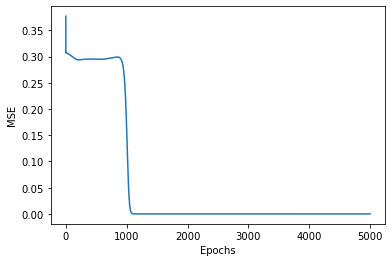

In [5]:
plt.plot(xor_obj.MSE)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()